**Punto 1. Sistema Experto. "Asesor de reconocimiento de equipos de red".**
Este sistema crea una plantilla con tres variables donde almacenaremos la cantidad de hosts y distancia entre los equipos de red que pedimos por input donde se guardan instanciando la plantilla y guardando el hecho . luego la variable tipo-equipo se modificara dependiendo las reglas que segun distancia y cantidad de host recomiendaran los equipos de red mas adecuados.

In [ ]:
#instalación de la librería
!pip install clipspy


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 875.7/875.7 kB 10.2 MB/s eta 0:00:00


In [ ]:
#importar paquete de clips
import clips
#declarar el ambiente
env= clips.Environment()
env.clear()


In [ ]:
env.build('''
(deftemplate Equipo
    (slot hosts (type INTEGER))
    (slot distancia (type INTEGER))
    (slot tipo_equipo (type STRING)))
''')

In [ ]:
hosts = int(input('Ingrese la cantidad de hosts en la red: '))
distancia = int(input('Ingrese la distancia máxima entre equipos en metros: '))

Ingrese la cantidad de hosts en la red: 50
Ingrese la distancia máxima entre equipos en metros: 20


In [ ]:
hecho_instance = env.assert_string(f"(Equipo (hosts {hosts}) (distancia {distancia}))")

In [ ]:
#ver lista de hechos
#env.reset()

for hecho in env.facts():
  print(hecho)

(Equipo (hosts 50) (distancia 20) (tipo_equipo ""))


In [ ]:
#reglas
regla1 ='''
(defrule R1
    ?eq <- (Equipo (hosts ?hosts) (distancia ?distancia))
    (test (<= ?hosts 100))
    (test (< ?distancia 30))
    =>
    (modify ?eq (tipo_equipo "Router Home -  Switch Ethernet(Switch Cisco Catalyst 2960.)")))'''


In [ ]:
env.build(regla1)

In [ ]:
regla2 = '''
(defrule R2
    ?eq <- (Equipo (hosts ?hosts) (distancia ?distancia))
    (test (and (> ?hosts 100) (<= ?hosts 200)))
    (test (and (>= ?distancia 30) (< ?distancia 60)))
    =>
    (modify ?eq (tipo_equipo "Router home - Varios switches de acceso - switch de nivel superior para gestionar la red(Switch de acceso HPE Aruba 3810.)")))
'''
env.build(regla2)

In [ ]:
regla3 = '''
(defrule R3
    ?eq <- (Equipo (hosts ?hosts) (distancia ?distancia))
    (test (and (> ?hosts 200) (<= ?hosts 400)))
    (test (and (>= ?distancia 60) (<= ?distancia 100)))
    =>
    (modify ?eq (tipo_equipo "Switch Ethernet(Switch Cisco Catalyst 3560.) - Routers para interconectar redes en diferentes ubicaciones(Router Cisco ISR 4000 Series.)")))
'''
env.build(regla3)

In [ ]:
regla4 = '''
(defrule R4
    ?eq <- (Equipo (hosts ?hosts) (distancia ?distancia))
    (test (> ?hosts 400))
    (test (> ?distancia 100))
    =>
    (modify ?eq (tipo_equipo "Routers para interconectar redes en diferentes ubicaciones(Cisco ISR 4000 Series.) - Switch de alta velocidad(Arista Networks 7060SX3) - access point(WAP300N).")))
'''
env.build(regla4)

In [ ]:
regla5 = '''
(defrule R5
    ?eq <- (Equipo (hosts ?hosts) (distancia ?distancia))
    (test (> ?hosts 200))
    (test (<= ?distancia 30))
    =>
    (modify ?eq (tipo_equipo "Arquitecturas SDN - Switches virtuales - controladores SDN para gestionar y reconfigurar la red de manera flexible - router home.")))
'''
env.build(regla5)

In [ ]:
#ver reglas
for r in env.rules():
  print(r)

(defrule MAIN::R1 ?eq <- (Equipo (hosts ?hosts) (distancia ?distancia)) (test (<= ?hosts 100)) (test (< ?distancia 30)) => (modify ?eq (tipo_equipo "Router Home - Switch Ethernet(Switch Cisco Catalyst 2960.)")))
(defrule MAIN::R2 ?eq <- (Equipo (hosts ?hosts) (distancia ?distancia)) (test (and (> ?hosts 100) (<= ?hosts 200))) (test (and (>= ?distancia 30) (< ?distancia 60))) => (modify ?eq (tipo_equipo "Router home - Varios switches de acceso - switch de nivel superior para gestionar la red(Switch de acceso HPE Aruba 3810.)")))
(defrule MAIN::R3 ?eq <- (Equipo (hosts ?hosts) (distancia ?distancia)) (test (and (> ?hosts 200) (<= ?hosts 400))) (test (and (>= ?distancia 60) (<= ?distancia 100))) => (modify ?eq (tipo_equipo "Switch Ethernet(Switch Cisco Catalyst 3560.) - Routers para interconectar redes en diferentes ubicaciones(Router Cisco ISR 4000 Series.)")))
(defrule MAIN::R4 ?eq <- (Equipo (hosts ?hosts) (distancia ?distancia)) (test (> ?hosts 400)) (test (> ?distancia 100)) => (modi

In [ ]:
res=env.run()
print (res)

clips.agenda.Activation

2


clips.agenda.Activation

In [ ]:
for hecho in env.facts():
    if hecho.template.name == "Equipo":
        print("Valores en la plantilla equipos:")
        print(f"hosts: {hecho['hosts']}")
        print(f"distancia: {hecho['distancia']}")
        print(f"equipo: {hecho['tipo_equipo']}")
        print("----------------------------------------------------------------------------")

Valores en la plantilla equipos:
hosts: 50
distancia: 20
equipo: Router Home -  Switch Ethernet(Switch Cisco Catalyst 2960.)
----------------------------------------------------------------------------


**Punto 2. Sistema Difuso**
LLevamos el sistema experto a difuso pero en vez de recomendar tipos de equipo se evaluan los costos dependiendo cantidad de host y distancia, para esto se tienen las reglas:
rule1 = si host es bajo y distancias es corta entonces  costo es barato
rule2 = si host es bajo y distancias es media entonces costo es costoso
rule3 = si host es bajo y distancias es larga entonces costo es muy costoso
rule4 = si host es medio y distancias es corta entonces costo es barato
rule5 = si host es medio y distancias es media entonces costo es costoso
rule6 = si host es medio y distancias es larga entonces costo es muy costoso
rule7 = si host es alto y distancias es corta entonces costo es costoso
rule8 = si host es alto y distancias es media entonces costo es muy costoso
rule9 = si host es alto y distancias es larga entonces costo es muy costoso

In [ ]:
#instalar libreria
!pip install -U scikit-fuzzy
print ("ok install")

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 994.0/994.0 kB 6.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894079 sha256=11b53f4edfd96a98b723d88175c2e3e377953b982eb76a0d395b0021f813754f
  Stored in directory: /root/.cache/pip/wheels/4f/86/1b/dfd97134a2c8313e519bcebd95d3fedc7be7944db022094bc8
Successfully built scikit-fuzzy
ok install


In [ ]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import matplotlib.pyplot as plt
print ("ok import")

ok import


In [ ]:
# variables
host = ctrl.Antecedent(np.arange(0, 401, 1), 'host')
distancias = ctrl.Antecedent(np.arange(0, 101, 1), 'distancias')
costo = ctrl.Consequent(np.arange(0, 101, 1), 'costo')
print ("Ok variables")

Ok variables


In [ ]:
#configurar MF -- host
host['bajo'] = fuzz.trimf(host.universe, [0, 0, 150])
host['medio'] = fuzz.trimf(host.universe, [100, 200, 300])
host['alto'] = fuzz.trimf(host.universe, [250, 400, 400])

#configurar MF -- distancia(m)
distancias['corta'] = fuzz.trimf(distancias.universe, [0, 0, 30])
distancias['media'] = fuzz.trimf(distancias.universe, [20, 50, 70])
distancias['larga'] = fuzz.trimf(distancias.universe, [55, 100, 100])

#configurar MF -- costo
costo['barato'] = fuzz.trimf(costo.universe, [0, 0, 40])
costo['costoso'] = fuzz.trimf(costo.universe, [20, 50, 80])
costo['muy costoso'] = fuzz.trimf(costo.universe, [60, 100, 100])

print (" ok configuración")

 ok configuración


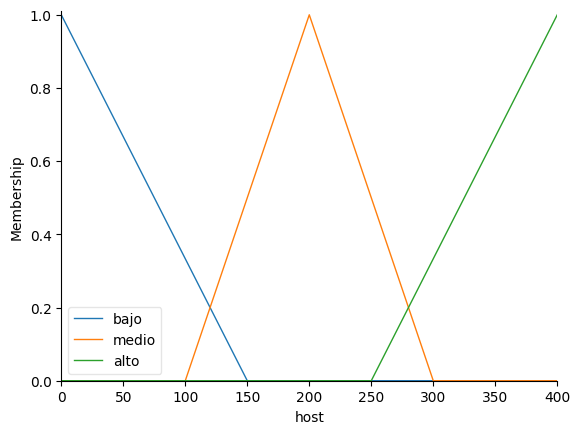

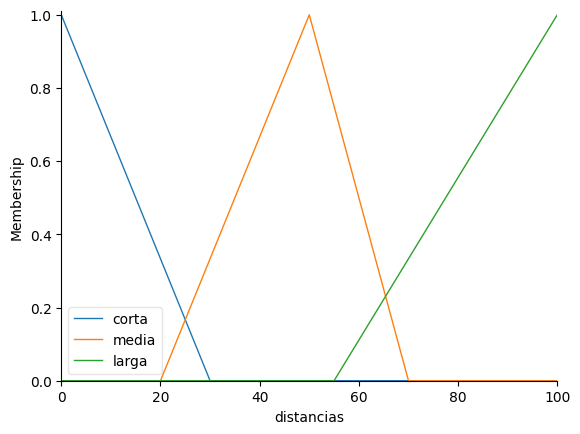

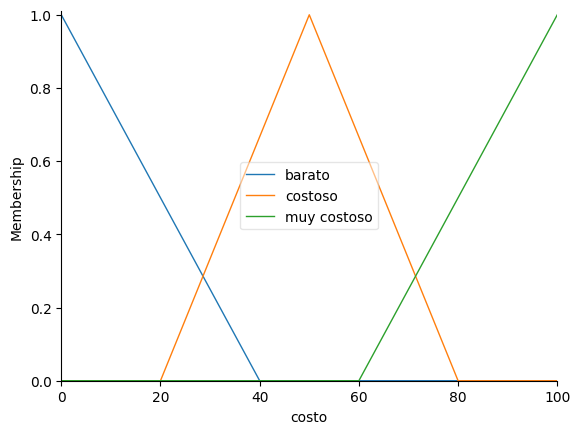

In [ ]:
#visualizar
host.view()
distancias.view()
costo.view()

In [ ]:
# Reglas
rule1 = ctrl.Rule(host['bajo'] & distancias['corta'], costo['barato'])
rule2 = ctrl.Rule(host['bajo'] & distancias['media'], costo['costoso'])
rule3 = ctrl.Rule(host['bajo'] & distancias['larga'], costo['muy costoso'])

rule4 = ctrl.Rule(host['medio'] & distancias['corta'], costo['barato'])
rule5 = ctrl.Rule(host['medio'] & distancias['media'], costo['costoso'])
rule6 = ctrl.Rule(host['medio'] & distancias['larga'], costo['muy costoso'])

rule7 = ctrl.Rule(host['alto'] & distancias['corta'], costo['costoso'])
rule8 = ctrl.Rule(host['alto'] & distancias['media'], costo['muy costoso'])
rule9 = ctrl.Rule(host['alto'] & distancias['larga'], costo['muy costoso'])

Ingrese la cantidad de hosts en la red: 50
Ingrese la distancia  entre equipos en metros: 50
50.00000000000001


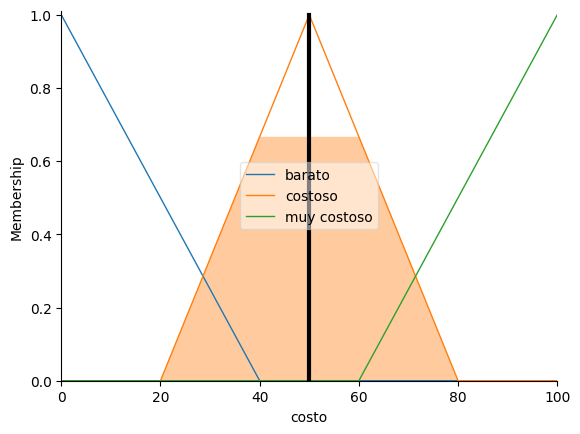

In [ ]:
##
costo_ctrl = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6, rule7, rule8, rule9])
cost = ctrl.ControlSystemSimulation(costo_ctrl)
cost.input['host'] = int(input('Ingrese la cantidad de hosts en la red: '))
cost.input['distancias'] = int(input('Ingrese la distancia  entre equipos en metros: '))
cost.compute()
print (cost.output['costo'])
costo.view(sim=cost)
plt.show()

Ingrese la cantidad de hosts en la red: 10
Ingrese la distancia  entre equipos en metros: 5
13.650793650793652


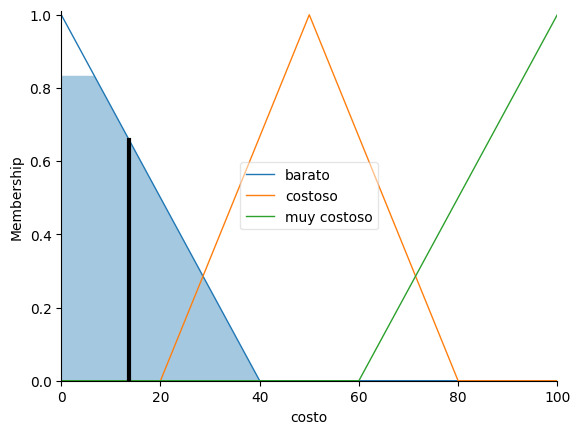

In [ ]:
cost.input['host'] = int(input('Ingrese la cantidad de hosts en la red: '))
cost.input['distancias'] = int(input('Ingrese la distancia  entre equipos en metros: '))
cost.compute()
print (cost.output['costo'])
costo.view(sim=cost)
plt.show()

Ingrese la cantidad de hosts en la red: 355
Ingrese la distancia  entre equipos en metros: 90
85.74358974358978


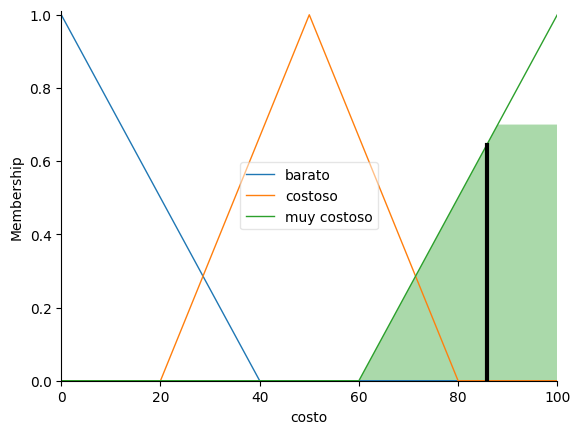

In [ ]:
cost.input['host'] = int(input('Ingrese la cantidad de hosts en la red: '))
cost.input['distancias'] = int(input('Ingrese la distancia  entre equipos en metros: '))
cost.compute()
print (cost.output['costo'])
costo.view(sim=cost)
plt.show()

Ingrese la cantidad de hosts en la red: 500
Ingrese la distancia  entre equipos en metros: 500
86.66666666666664


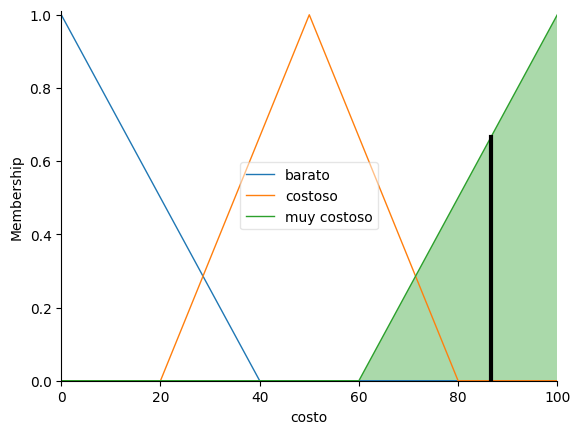

In [ ]:
cost.input['host'] = int(input('Ingrese la cantidad de hosts en la red: '))
cost.input['distancias'] = int(input('Ingrese la distancia  entre equipos en metros: '))
cost.compute()
print (cost.output['costo'])
costo.view(sim=cost)
plt.show()